In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
data_df = pd.read_csv('./logs/all_UTM_sim_data.csv')

In [37]:
data_df.head()

,agent_id,eVTOL_type,simulation_type,algorithm_type,Number_of_conflicts,Desired_time_of_departure,Actual_time_of_departure,Ideal_time_of_arrival,Actual_time_of_arrival,Time_required_for_preflight_calculation,Average_time_to_plan_avoidance,Total_planning_time,Location_of_weather_statistics
0,1,lift_and_cruse,reactive,MVP_Bluesky,0,100.0,100.0,808.673469,808.673469,NaN,0.000173,0.023846,NaN
1,2,lift_and_cruse,reactive,MVP_Bluesky,0,180.0,180.0,888.673469,888.673469,NaN,0.000178,0.024561,NaN
2,3,lift_and_cruse,reactive,MVP_Bluesky,0,280.0,280.0,988.673469,988.940916,NaN,0.000195,0.026896,NaN
3,4,lift_and_cruse,reactive,MVP_Bluesky,0,480.0,480.0,1188.673469,1188.673469,NaN,0.000205,0.028336,NaN
4,5,lift_and_cruse,reactive,MVP_Bluesky,0,0.0,0.0,1227.458455,1227.813780,NaN,0.000193,0.046797,NaN


In [38]:
data_df.describe()

,agent_id,Number_of_conflicts,Desired_time_of_departure,Actual_time_of_departure,Ideal_time_of_arrival,Actual_time_of_arrival,Time_required_for_preflight_calculation,Average_time_to_plan_avoidance,Total_planning_time
count,1.213010e+06,1.213010e+06,1.213010e+06,1.213010e+06,1.213010e+06,1.213010e+06,29460.000000,1.183550e+06,1.183550e+06
mean,6.065055e+05,2.252972e+00,3.600682e+03,3.914800e+03,5.093651e+03,5.700782e+03,2.165547,2.716829e-04,7.956242e-02
std,3.501660e+05,7.305550e+00,2.076841e+03,2.196534e+03,2.348091e+03,2.629683e+03,10.210420,3.123670e-05,4.895602e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.692568e+02,4.451596e+02,0.000705,1.641693e-04,1.491356e-02
25%,3.032532e+05,0.000000e+00,2.170000e+03,2.430000e+03,3.480179e+03,3.907728e+03,0.165300,2.554127e-04,4.392457e-02
50%,6.065055e+05,0.000000e+00,3.380000e+03,3.740000e+03,4.701537e+03,5.330689e+03,0.351814,2.694626e-04,6.610823e-02
75%,9.097578e+05,2.000000e+00,4.695000e+03,5.050000e+03,6.276105e+03,7.118863e+03,0.930676,2.865405e-04,1.061280e-01
max,1.213010e+06,1.730000e+02,2.771000e+04,2.771000e+04,2.895018e+04,2.895124e+04,529.048430,3.141650e-03,8.994308e-01


In [39]:
data_df.shape

(1213010, 13)

In [40]:
print(pd.unique(data_df['eVTOL_type']))
print(pd.unique(data_df['simulation_type']))
print(pd.unique(data_df['algorithm_type']))


['lift_and_cruse' 'multicopter' 'vector_thrust']
['reactive' 'strategic']
['MVP_Bluesky' 'Decoupled' 'LocalVO' 'SIPP']


# CASE STUDY-1

In [41]:
df1 = data_df[data_df['eVTOL_type']=='vector_thrust']
df2 = data_df[data_df['eVTOL_type']=='lift_and_cruse']
df3 = data_df[data_df['eVTOL_type']=='multicopter']

In [42]:
vt = np.mean(df1['Actual_time_of_arrival']-df1['Actual_time_of_departure'])/60
lc = np.mean(df2['Actual_time_of_arrival']-df2['Actual_time_of_departure'])/60
mc = np.mean(df3['Actual_time_of_arrival']-df3['Actual_time_of_departure'])/60

Text(0, 0.5, 'Average Travel Time (min)')

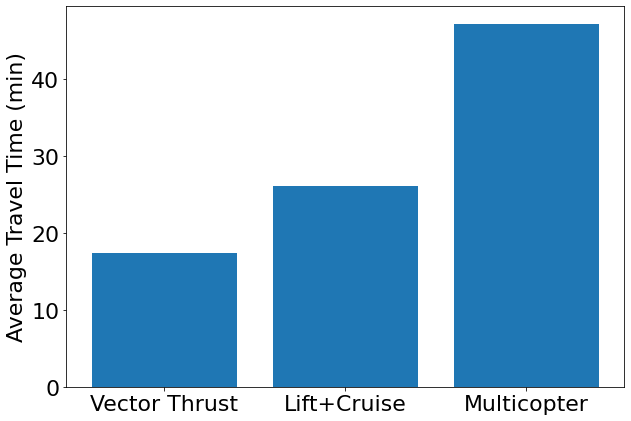

In [43]:
fig1 = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22})
plt.bar(['Vector Thrust','Lift+Cruise', 'Multicopter'],[vt,lc,mc])
plt.ylabel("Average Travel Time (min)")
# plt.xticks(['vector thrust','lift+cruise', 'multicopter'])

# CASE STUDY 2

In [44]:
locations = ['ATL','JFK','BOS','ORD','LAX']

In [45]:
mean_travel_time = []
vts = []
lcs = []
mcs = []
for loc in locations:
    df = data_df[data_df['Location_of_weather_statistics']==loc]
    df = df[df['simulation_type']=='reactive']

    df1 = df[df['eVTOL_type']=='vector_thrust']
    df2 = df[df['eVTOL_type']=='lift_and_cruse']
    df3 = df[df['eVTOL_type']=='multicopter']
    
    df = data_df[pd.isnull(data_df['Location_of_weather_statistics'])]
    df = df[df['simulation_type']=='reactive']
    
    df4 = df[df['eVTOL_type']=='vector_thrust']
    df5 = df[df['eVTOL_type']=='lift_and_cruse']
    df6 = df[df['eVTOL_type']=='multicopter']
    
    vt_w = np.mean(df4['Actual_time_of_arrival']-df4['Actual_time_of_departure'])/60
    lc_w = np.mean(df5['Actual_time_of_arrival']-df5['Actual_time_of_departure'])/60
    mc_w = np.mean(df6['Actual_time_of_arrival']-df6['Actual_time_of_departure'])/60
    
    vt = np.mean(df1['Actual_time_of_arrival']-df1['Actual_time_of_departure'])/60
    lc = np.mean(df2['Actual_time_of_arrival']-df2['Actual_time_of_departure'])/60
    mc = np.mean(df3['Actual_time_of_arrival']-df3['Actual_time_of_departure'])/60
    vts.append(abs(vt-vt_w))
    lcs.append(abs(lc-lc_w))
    mcs.append(abs(mc-mc_w))
    print(vt,lc,mc)
print(vts,lcs,mcs)

17.463026318555244 24.1164900138428 44.941027776847505
16.892792621000655 26.971503311053635 45.1598275193752
17.102272284935307 23.75935284161105 46.70756595429474
17.21228022872237 25.664635876029923 44.87681378803766
16.518328772016524 26.06567658699468 45.81642060488387
[0.09337486002861439, 0.6636085575832027, 0.45412889364855147, 0.34412094986148745, 1.0380724065673341] [7.376534626974362, 4.521521329763527, 7.73367179920611, 5.828388764787238, 5.427348053822481] [2.370908486102735, 2.5897082286304283, 4.137446663549973, 2.306694497292888, 3.246301314139096]


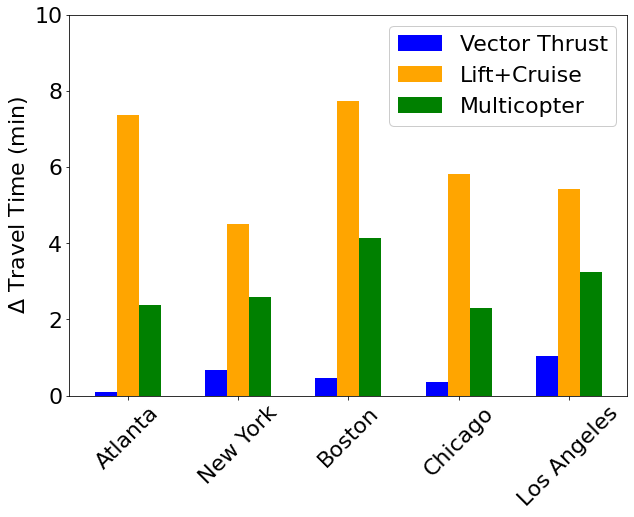

In [46]:
locations = ['Atlanta','New York','Boston','Chicago','Los Angeles']
fig1 = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22})
x = np.arange(len(locations))
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, vts, width, color='blue')
plt.bar(x, lcs, width, color='orange')
plt.bar(x+0.2, mcs, width, color='green')
plt.xticks(x, locations,rotation=45)
# plt.xlabel("Teams")
plt.ylabel("$\Delta$ Travel Time (min)")
plt.ylim([0,10])
plt.legend(['Vector Thrust','Lift+Cruise', 'Multicopter'], loc='upper right', framealpha=1)